In [1]:
cov_type_var = 'HC3'

<br>

# Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/home/boturon/miniconda3/envs/gis/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<br>

# Functions

In [2]:
def gof_range(yhat):
    results = [0, 0]
    for i in yhat.values:
        if i < 0:
            results[0] += 1
        elif i > 1:
            results[1] += 1
    return("Values under 0: "+ str(round(100*results[0]/len(yhat.values),2))+"%."+"\n"+"Values over 1: "+ str(round(100*results[1]/len(yhat.values),2))+"%."+"\n"+"Values fucked up: "+ str(round(100*np.sum(results)/len(yhat.values),2))+"%.", np.sum(results)/len(yhat.values))

In [3]:
def gof_pcp(yhat):
    cpredicted = 0
    for index, i in enumerate(yhat.values):
        if i >= 0.5:
            if list(y)[index] == 1:
                cpredicted += 1
        else:
            if list(y)[index] == 0:
                cpredicted += 1
    pcpredicted = cpredicted/len(yhat)
    return("Percent Correctly Predicted: "+ str(round(100*pcpredicted, 2))+"%.", pcpredicted)

<br>

# Data

In [4]:
results_sofar = pd.DataFrame(index= ["R^2", "R^2 Adj.", "Out Range", "GoF", "n"]) 

In [5]:
data = pd.read_csv("./data_all.csv", index_col=0)

In [6]:
y = data.init_vote_result.copy()

## Specific regression

In [9]:
data_pro_res = data[data.init_type == "Projeto de Resolução"].copy()
data_pro_law = data[data.init_type == "Projeto de Lei"].copy()
y_pro_res = data_pro_res.init_vote_result.copy()
y_pro_law = data_pro_law.init_vote_result.copy()

In [10]:
y_pro_res.shape

(2618,)

In [11]:
y_pro_law.shape

(3577,)

<br>

> # Model 01

## Model 0101

In [12]:
list_col_0101 = ["count_events", "count_past_votes", "count_total", "HHI_age", "leg_mean", "comi_mean",
              "share_PSD", "share_CDS", "share_BE", "share_PEV", "share_PCP", "HHI_party", 
              "share_PSD_gov_PSD", "share_CDS_gov_CDS", "share_PCP_gov_PCP", "share_PSD_gov_PSD_maj_abs",
              "share_CDS_gov_CDS_maj_abs", "share_PCP_gov_PCP_maj_abs", "maj_abs", "coal", "gov_PSD",
              "gov_CDS", "gov_PCP", "yr_1992", "yr_1993", "yr_1994", "yr_1995", "yr_1996", "yr_1997", 
              "yr_1998", "yr_1999", "yr_2000", "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", 
              "yr_2006", "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012", "yr_2013", 
              "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [13]:
data_0101 = sm.add_constant(data[list_col_0101])
X_0101 = data_0101
model_0101 = sm.OLS(y,X_0101)
results_0101 = model_0101.fit()
results_0101.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     530.0
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:08   Log-Likelihood:                -3309.6
No. Observations:                6447   AIC:                             6707.
Df Residuals:                    6403   BIC:                             7005.
Df Model:                          43                                         
Covariance Type:                  HC3                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.2452      0.102     12.155      0.000       1.044       1.446
count_events                 -0.0390      0.003    -12.099      0.000      -0.045      -0.033
count_past_votes              0.1484      0.006     26.072      0.000       0.137       0.160
count_total                   0.0022      0.001      1.567      0.117      -0.001       0.005
HHI_age                       0.0761      0.031      2.423      0.015       0.015       0.138
leg_mean                      0.0310      0.008      3.722      0.000       0.015       0.047
comi_mean                    -0.0630      0.014     -4.648      0.000      -0.090      -0.036
share_PSD                    -0.1281      0.019     -6.714      0.000      -0.165      -0.091
share_CDS                 -4.812e-16   1.84e-16     -2.614      0.009   -8.42e-16    -1.2e-16
share_BE                     -0.2432      0.016    -15.408      0.000      -0.274      -0.212
share_PEV                    -0.0966      0.034     -2.844      0.004      -0.163      -0.030
share_PCP                    -0.1468      0.016     -9.113      0.000      -0.178      -0.115
HHI_party                    -0.3957      0.067     -5.862      0.000      -0.528      -0.263
share_PSD_gov_PSD             0.2358      0.013     18.010      0.000       0.210       0.261
share_CDS_gov_CDS         -5.257e-16   3.91e-16     -1.345      0.179   -1.29e-15    2.41e-16
share_PCP_gov_PCP            -0.0250      0.015     -1.614      0.107      -0.055       0.005
share_PSD_gov_PSD_maj_abs     0.2358      0.013     18.010      0.000       0.210       0.261
share_CDS_gov_CDS_maj_abs  1.349e-15   5.87e-16      2.297      0.022    1.98e-16     2.5e-15
share_PCP_gov_PCP_maj_abs    -0.0250      0.015     -1.614      0.107      -0.055       0.005
maj_abs                      -0.3472      0.068     -5.134      0.000      -0.480      -0.215
coal                          0.1507      0.066      2.275      0.023       0.021       0.281
gov_PSD                       0.2051      0.170      1.206      0.228      -0.128       0.538
gov_CDS                      -0.3592      0.109     -3.295      0.001      -0.573      -0.146
gov_PCP                       0.5099      0.078      6.519      0.000       0.357       0.663
yr_1992                      -0.3323      0.180     -1.851      0.064      -0.684       0.020
yr_1993                      -0.2339      0.175     -1.333      0.183      -0.578       0.110
yr_1994                      -0.2759      0.179     -1.544      0.123      -0.626       0.074
yr_1995                      -0.0887      0.170     -0.522      0.602      -0.422       0.245
yr_1996                       0.0642      0.084      0.765      0.445      -0.100       0.229
yr_1997                       0.0369      0.077      0.479      0.632      

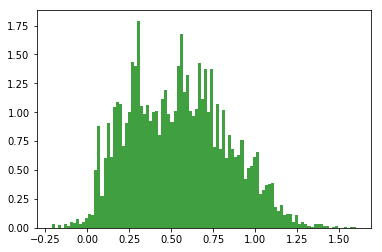

In [14]:
yhat_0101 = results_0101.predict(X_0101);
plt.hist(yhat_0101, 100, density=1, facecolor='green', alpha=0.75);

In [15]:
print(gof_range(yhat_0101)[0])

Values under 0: 0.79%.
Values over 1: 7.03%.
Values fucked up: 7.82%.


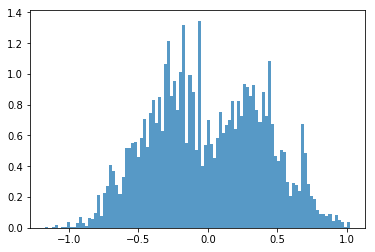

In [16]:
plt.hist(y-yhat_0101, 100, density=1, alpha=0.75);

In [17]:
print(gof_pcp(yhat_0101)[0])

Percent Correctly Predicted: 77.17%.


In [18]:
results_sofar["0101"] = [results_0101.rsquared, results_0101.rsquared_adj, gof_range(yhat_0101)[1], gof_pcp(yhat_0101)[1], len(yhat_0101)]
results_sofar

0101
R^2           0.341268
R^2 Adj.      0.336844
Out Range     0.078176
GoF           0.771677
n          6447.000000

<br>

## Model 0102

In [19]:
list_col_0102 = ["count_events", "count_past_votes", "count_total", "age_mean", 
                 "HHI_age", "leg_mean", "comi_mean", "share_2029", "share_3039", 
                 "share_5059", "share_6069", "share_7079", "share_PSD", "share_CDS", 
                 "share_BE", "share_PEV", "share_PCP", "HHI_party", "share_PSD_gov_PSD", 
                 "share_CDS_gov_CDS", "share_PCP_gov_PCP", "share_PSD_gov_PSD_maj_abs", 
                 "share_CDS_gov_CDS_maj_abs", "share_PCP_gov_PCP_maj_abs", "maj_abs", 
                 "coal", "gov_PSD", "gov_CDS", "gov_PCP", "yr_1992", "yr_1993", "yr_1994", 
                 "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000", "yr_2001",
                 "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", "yr_2007", "yr_2008",
                 "yr_2009", "yr_2010", "yr_2011", "yr_2012", "yr_2013", "yr_2014", "yr_2015", 
                 "yr_2016", "yr_2017"]

In [20]:
data_0102 = sm.add_constant(data[list_col_0102])
y_0102 = data.init_vote_result
X_0102 = data_0102
model_0102 = sm.OLS(y,X_0102)
results_0102 = model_0102.fit()
results_0102.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     524.9
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:12   Log-Likelihood:                -3300.0
No. Observations:                6447   AIC:                             6700.
Df Residuals:                    6397   BIC:                             7038.
Df Model:                          49                                         
Covariance Type:                  HC3                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.1443      0.218      5.250      0.000       0.717       1.572
count_events                 -0.0389      0.003    -12.036      0.000      -0.045      -0.033
count_past_votes              0.1481      0.006     25.930      0.000       0.137       0.159
count_total                   0.0018      0.001      1.251      0.211      -0.001       0.005
age_mean                      0.0027      0.004      0.635      0.525      -0.006       0.011
HHI_age                       0.0579      0.033      1.763      0.078      -0.006       0.122
leg_mean                      0.0183      0.009      1.943      0.052      -0.000       0.037
comi_mean                    -0.0565      0.014     -3.939      0.000      -0.085      -0.028
share_2029                   -0.1927      0.101     -1.909      0.056      -0.391       0.005
share_3039                   -0.0385      0.049     -0.789      0.430      -0.134       0.057
share_5059                   -0.0418      0.048     -0.865      0.387      -0.137       0.053
share_6069                   -0.0191      0.094     -0.203      0.839      -0.204       0.165
share_7079                    0.1790      0.155      1.153      0.249      -0.125       0.483
share_PSD                    -0.1209      0.020     -6.133      0.000      -0.160      -0.082
share_CDS                  2.277e-15   1.37e-15      1.666      0.096   -4.03e-16    4.96e-15
share_BE                     -0.2354      0.016    -14.295      0.000      -0.268      -0.203
share_PEV                    -0.0780      0.036     -2.163      0.031      -0.149      -0.007
share_PCP                    -0.1205      0.018     -6.669      0.000      -0.156      -0.085
HHI_party                    -0.4042      0.067     -6.019      0.000      -0.536      -0.273
share_PSD_gov_PSD             0.2419      0.013     17.932      0.000       0.215       0.268
share_CDS_gov_CDS         -3.182e-16   1.31e-16     -2.422      0.015   -5.76e-16   -6.06e-17
share_PCP_gov_PCP            -0.0256      0.016     -1.592      0.111      -0.057       0.006
share_PSD_gov_PSD_maj_abs     0.2419      0.013     17.932      0.000       0.215       0.268
share_CDS_gov_CDS_maj_abs  3.415e-16   2.83e-16      1.207      0.227   -2.13e-16    8.96e-16
share_PCP_gov_PCP_maj_abs    -0.0256      0.016     -1.592      0.111      -0.057       0.006
maj_abs                      -0.3685      0.068     -5.412      0.000      -0.502      -0.235
coal                          0.1665      0.066      2.511      0.012       0.037       0.296
gov_PSD                       0.2103      0.170      1.240      0.215      -0.122       0.543
gov_CDS                      -0.3570      0.109     -3.285      0.001      -0.570      -0.144
gov_PCP                       0.5235      0.078      6.696      0.000      

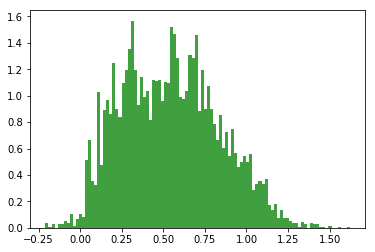

In [21]:
yhat_0102 = results_0102.predict(X_0102);
plt.hist(yhat_0102, 100, density=1, facecolor='green', alpha=0.75);

In [22]:
print(gof_range(yhat_0102)[0])

Values under 0: 0.81%.
Values over 1: 7.15%.
Values fucked up: 7.96%.


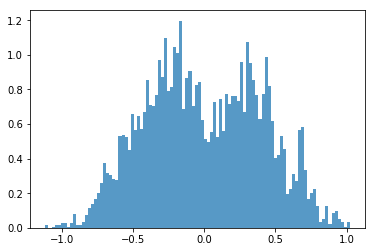

In [23]:
plt.hist(y-yhat_0102, 100, density=1, alpha=0.75);

In [24]:
print(gof_pcp(yhat_0102)[0])

Percent Correctly Predicted: 77.17%.


In [25]:
results_sofar["0102"] = [results_0102.rsquared, results_0102.rsquared_adj, gof_range(yhat_0102)[1], gof_pcp(yhat_0102)[1], len(yhat_0102)]
results_sofar

0101         0102
R^2           0.341268     0.343231
R^2 Adj.      0.336844     0.338200
Out Range     0.078176     0.079572
GoF           0.771677     0.771677
n          6447.000000  6447.000000

<br>

> # Model 02

# Model 0200

In [26]:
list_col_0200 = ["count_events", "count_past_votes", "count_total", "age_mean", 
                 "HHI_age", "leg_mean", "comi_mean", "share_2029", "share_3039", 
                 "share_5059", "share_6069", "share_7079", "share_PSD", "share_CDS", 
                 "share_BE", "share_PEV", "share_PCP", "HHI_party", "share_PSD_gov_PSD", 
                 "share_CDS_gov_CDS", "share_PCP_gov_PCP", "share_PSD_gov_PSD_maj_abs", 
                 "share_CDS_gov_CDS_maj_abs", "share_PCP_gov_PCP_maj_abs", "share_women", "maj_abs", 
                 "coal", "gov_PSD", "gov_CDS", "gov_PCP", "yr_1992", "yr_1993", "yr_1994", 
                 "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000", "yr_2001",
                 "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", "yr_2007", "yr_2008",
                 "yr_2009", "yr_2010", "yr_2011", "yr_2012", "yr_2013", "yr_2014", "yr_2015", 
                 "yr_2016", "yr_2017"]

In [27]:
data_0200 = sm.add_constant(data[list_col_0200])
y_0200 = data.init_vote_result
X_0200 = data_0200
model_0200 = sm.OLS(y,X_0200)
results_0200 = model_0200.fit()
results_0200.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     504.6
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:17   Log-Likelihood:                -3295.9
No. Observations:                6447   AIC:                             6694.
Df Residuals:                    6396   BIC:                             7039.
Df Model:                          50                                         
Covariance Type:                  HC3                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.1479      0.218      5.271      0.000       0.721       1.575
count_events                 -0.0394      0.003    -12.135      0.000      -0.046      -0.033
count_past_votes              0.1486      0.006     26.011      0.000       0.137       0.160
count_total                   0.0020      0.001      1.418      0.156      -0.001       0.005
age_mean                      0.0018      0.004      0.419      0.675      -0.007       0.010
HHI_age                       0.0683      0.033      2.076      0.038       0.004       0.133
leg_mean                      0.0199      0.009      2.112      0.035       0.001       0.038
comi_mean                    -0.0522      0.014     -3.610      0.000      -0.081      -0.024
share_2029                   -0.2234      0.101     -2.211      0.027      -0.421      -0.025
share_3039                   -0.0501      0.049     -1.024      0.306      -0.146       0.046
share_5059                   -0.0463      0.048     -0.959      0.337      -0.141       0.048
share_6069                   -0.0036      0.094     -0.039      0.969      -0.188       0.181
share_7079                    0.2216      0.156      1.419      0.156      -0.085       0.528
share_PSD                    -0.1156      0.020     -5.821      0.000      -0.155      -0.077
share_CDS                 -2.317e-16   1.55e-16     -1.490      0.136   -5.37e-16    7.31e-17
share_BE                     -0.2471      0.017    -14.548      0.000      -0.280      -0.214
share_PEV                    -0.1224      0.039     -3.156      0.002      -0.198      -0.046
share_PCP                    -0.1143      0.018     -6.278      0.000      -0.150      -0.079
HHI_party                    -0.4068      0.067     -6.073      0.000      -0.538      -0.276
share_PSD_gov_PSD             0.2429      0.014     17.976      0.000       0.216       0.269
share_CDS_gov_CDS         -3.134e-17   3.45e-16     -0.091      0.928   -7.08e-16    6.45e-16
share_PCP_gov_PCP            -0.0408      0.017     -2.408      0.016      -0.074      -0.008
share_PSD_gov_PSD_maj_abs     0.2429      0.014     17.976      0.000       0.216       0.269
share_CDS_gov_CDS_maj_abs  5.957e-16   3.37e-16      1.769      0.077   -6.45e-17    1.26e-15
share_PCP_gov_PCP_maj_abs    -0.0408      0.017     -2.408      0.016      -0.074      -0.008
share_women                   0.0942      0.032      2.925      0.003       0.031       0.157
maj_abs                      -0.3661      0.068     -5.355      0.000      -0.500      -0.232
coal                          0.1652      0.066      2.498      0.013       0.036       0.295
gov_PSD                       0.2077      0.169      1.228      0.219      -0.124       0.539
gov_CDS                      -0.3647      0.108     -3.368      0.001      

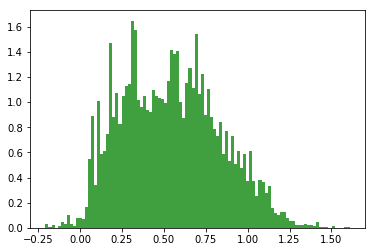

In [28]:
yhat_0200 = results_0200.predict(X_0200);
plt.hist(yhat_0200, 100, density=1, facecolor='green', alpha=0.75);

In [29]:
print(gof_range(yhat_0200)[0])

Values under 0: 0.79%.
Values over 1: 7.07%.
Values fucked up: 7.86%.


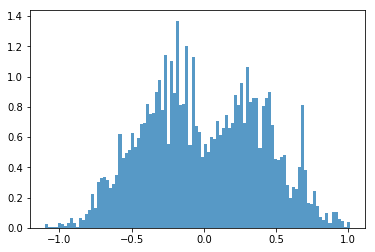

In [30]:
plt.hist(y-yhat_0200, 100, density=1, alpha=0.75);

In [31]:
print(gof_pcp(yhat_0200)[0])

Percent Correctly Predicted: 77.42%.


In [32]:
results_sofar["0200"] = [results_0200.rsquared, results_0200.rsquared_adj, gof_range(yhat_0200)[1], gof_pcp(yhat_0200)[1], len(yhat_0200)]
results_sofar

0101         0102         0200
R^2           0.341268     0.343231     0.344056
R^2 Adj.      0.336844     0.338200     0.338928
Out Range     0.078176     0.079572     0.078641
GoF           0.771677     0.771677     0.774159
n          6447.000000  6447.000000  6447.000000

<br>

> # Model 03

# Model 0300

In [33]:
list_col_0300 = ["count_events", "count_past_votes", "count_total", "age_mean", 
                 "HHI_age", "leg_mean", "comi_mean", "share_2029", "share_3039", 
                 "share_5059", "share_6069", "share_7079", "share_PSD", "share_CDS", 
                 "share_BE", "share_PEV", "share_PCP", "HHI_party", "share_PSD_gov_PSD", 
                 "share_CDS_gov_CDS", "share_PCP_gov_PCP", "share_PSD_gov_PSD_maj_abs", 
                 "share_CDS_gov_CDS_maj_abs", "share_PCP_gov_PCP_maj_abs", "share_women", "maj_abs", 
                 "coal", "gov_PSD", "gov_CDS", "gov_PCP", "yr_1992", "yr_1993", "yr_1994", 
                 "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000", "yr_2001",
                 "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", "yr_2007", "yr_2008",
                 "yr_2009", "yr_2010", "yr_2011", "yr_2012", "yr_2013", "yr_2014", "yr_2015", 
                 "yr_2016", "yr_2017"]

In [34]:
data_0300 = sm.add_constant(data[list_col_0300])
y_0300 = data.init_vote_result
X_0300 = data_0300
model_0300 = sm.OLS(y,X_0300)
results_0300 = model_0300.fit()
results_0300.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     504.6
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:22   Log-Likelihood:                -3295.9
No. Observations:                6447   AIC:                             6694.
Df Residuals:                    6396   BIC:                             7039.
Df Model:                          50                                         
Covariance Type:                  HC3                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.1479      0.218      5.271      0.000       0.721       1.575
count_events                 -0.0394      0.003    -12.135      0.000      -0.046      -0.033
count_past_votes              0.1486      0.006     26.011      0.000       0.137       0.160
count_total                   0.0020      0.001      1.418      0.156      -0.001       0.005
age_mean                      0.0018      0.004      0.419      0.675      -0.007       0.010
HHI_age                       0.0683      0.033      2.076      0.038       0.004       0.133
leg_mean                      0.0199      0.009      2.112      0.035       0.001       0.038
comi_mean                    -0.0522      0.014     -3.610      0.000      -0.081      -0.024
share_2029                   -0.2234      0.101     -2.211      0.027      -0.421      -0.025
share_3039                   -0.0501      0.049     -1.024      0.306      -0.146       0.046
share_5059                   -0.0463      0.048     -0.959      0.337      -0.141       0.048
share_6069                   -0.0036      0.094     -0.039      0.969      -0.188       0.181
share_7079                    0.2216      0.156      1.419      0.156      -0.085       0.528
share_PSD                    -0.1156      0.020     -5.821      0.000      -0.155      -0.077
share_CDS                 -2.317e-16   1.55e-16     -1.490      0.136   -5.37e-16    7.31e-17
share_BE                     -0.2471      0.017    -14.548      0.000      -0.280      -0.214
share_PEV                    -0.1224      0.039     -3.156      0.002      -0.198      -0.046
share_PCP                    -0.1143      0.018     -6.278      0.000      -0.150      -0.079
HHI_party                    -0.4068      0.067     -6.073      0.000      -0.538      -0.276
share_PSD_gov_PSD             0.2429      0.014     17.976      0.000       0.216       0.269
share_CDS_gov_CDS         -3.134e-17   3.45e-16     -0.091      0.928   -7.08e-16    6.45e-16
share_PCP_gov_PCP            -0.0408      0.017     -2.408      0.016      -0.074      -0.008
share_PSD_gov_PSD_maj_abs     0.2429      0.014     17.976      0.000       0.216       0.269
share_CDS_gov_CDS_maj_abs  5.957e-16   3.37e-16      1.769      0.077   -6.45e-17    1.26e-15
share_PCP_gov_PCP_maj_abs    -0.0408      0.017     -2.408      0.016      -0.074      -0.008
share_women                   0.0942      0.032      2.925      0.003       0.031       0.157
maj_abs                      -0.3661      0.068     -5.355      0.000      -0.500      -0.232
coal                          0.1652      0.066      2.498      0.013       0.036       0.295
gov_PSD                       0.2077      0.169      1.228      0.219      -0.124       0.539
gov_CDS                      -0.3647      0.108     -3.368      0.001      

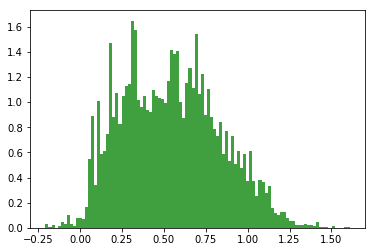

In [35]:
yhat_0300 = results_0300.predict(X_0300);
plt.hist(yhat_0300, 100, density=1, facecolor='green', alpha=0.75);

In [36]:
print(gof_range(yhat_0300)[0])

Values under 0: 0.79%.
Values over 1: 7.07%.
Values fucked up: 7.86%.


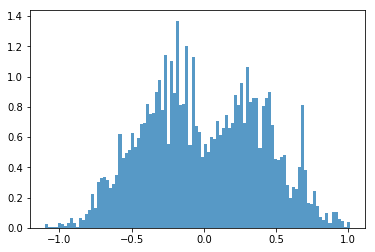

In [37]:
plt.hist(y-yhat_0300, 100, density=1, alpha=0.75);

In [38]:
print(gof_pcp(yhat_0300)[0])

Percent Correctly Predicted: 77.42%.


In [39]:
results_sofar["0300"] = [results_0300.rsquared, results_0300.rsquared_adj, gof_range(yhat_0300)[1], gof_pcp(yhat_0300)[1], len(yhat_0300)]
results_sofar

0101         0102         0200         0300
R^2           0.341268     0.343231     0.344056     0.344056
R^2 Adj.      0.336844     0.338200     0.338928     0.338928
Out Range     0.078176     0.079572     0.078641     0.078641
GoF           0.771677     0.771677     0.774159     0.774159
n          6447.000000  6447.000000  6447.000000  6447.000000

<br>

> # Model 05

# Model 0500

In [40]:
list_col_0500 =  ["count_events", "count_past_votes", "count_total", "HHI_age", "inter_mean", 
                  "share_lawyer", "share_PSD", "share_CDS", "share_BE", "share_PEV", "share_PCP",
                  "HHI_party", "count_men_opp_party", "count_women_gov_party", "count_women_opp_party",
                  "count_total_count_men_opp_party", "count_total_count_women_opp_party",
                  "count_total_count_women_gov_party", "share_gov_party", "share_gov_party_maj_abs",
                  "maj_abs", "coal", "gov_PSD", "gov_CDS", "gov_PS", "gov_PCP", "yr_1992", "yr_1993", 
                  "yr_1994", "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000", "yr_2001", 
                  "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", "yr_2007", "yr_2008", "yr_2009",
                  "yr_2010", "yr_2011", "yr_2012", "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [41]:
data_0500 = sm.add_constant(data[list_col_0500])
y_0500 = data.init_vote_result
X_0500 = data_0500
model_0500 = sm.OLS(y,X_0500)
results_0500 = model_0500.fit()
results_0500.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     561.4
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:26   Log-Likelihood:                -3269.2
No. Observations:                6447   AIC:                             6638.
Df Residuals:                    6397   BIC:                             6977.
Df Model:                          49                                         
Covariance Type:                  HC3                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.8660      0.089      9.732      0.000       0.692       1.040
count_events                         -0.0390      0.003    -12.052      0.000      -0.045      -0.033
count_past_votes                      0.1476      0.006     26.002      0.000       0.136       0.159
count_total                           0.0010      0.003      0.281      0.779      -0.006       0.008
HHI_age                               0.0664      0.034      1.964      0.050       0.000       0.133
inter_mean                        -7.834e-05   4.07e-05     -1.925      0.054      -0.000    1.46e-06
share_lawyer                         -0.0745      0.031     -2.393      0.017      -0.136      -0.013
share_PSD                             0.0365      0.019      1.914      0.056      -0.001       0.074
share_CDS                          7.001e-14   8.84e-15      7.920      0.000    5.27e-14    8.73e-14
share_BE                             -0.2062      0.023     -9.013      0.000      -0.251      -0.161
share_PEV                            -0.0596      0.039     -1.522      0.128      -0.136       0.017
share_PCP                            -0.0745      0.021     -3.602      0.000      -0.115      -0.034
HHI_party                            -0.3753      0.070     -5.341      0.000      -0.513      -0.238
count_men_opp_party                  -0.0112      0.005     -2.136      0.033      -0.021      -0.001
count_women_gov_party                -0.0312      0.010     -2.992      0.003      -0.052      -0.011
count_women_opp_party                 0.0047      0.012      0.390      0.697      -0.019       0.028
count_total_count_men_opp_party       0.0005      0.000      1.946      0.052   -4.07e-06       0.001
count_total_count_women_opp_party -8.513e-05      0.001     -0.084      0.933      -0.002       0.002
count_total_count_women_gov_party     0.0014      0.001      2.135      0.033       0.000       0.003
share_gov_party                       0.1526      0.033      4.649      0.000       0.088       0.217
share_gov_party_maj_abs               0.1830      0.031      5.883      0.000       0.122       0.244
maj_abs                              -0.3677      0.067     -5.477      0.000      -0.499      -0.236
coal                                  0.0347      0.063      0.548      0.584      -0.089       0.159
gov_PSD                               0.5867      0.113      5.180      0.000       0.365       0.809
gov_CDS                              -0.3127      0.103     -3.022      0.003      -0.516      -0.110
gov_PS                                0.2793      0.065      4.311      0.000       0.152       0.406
gov_PCP                               0.3473      0.077      4.530      0.000       0.197       0.498
yr_1992                

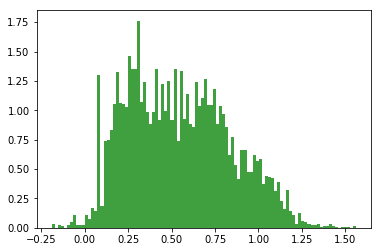

In [42]:
yhat_0500 = results_0500.predict(X_0500);
plt.hist(yhat_0500, 100, density=1, facecolor='green', alpha=0.75);

In [43]:
print(gof_range(yhat_0500)[0])

Values under 0: 0.59%.
Values over 1: 7.9%.
Values fucked up: 8.48%.


In [44]:
plt.hist(y-yhat_0500, 100, density=1, alpha=0.75);

In [45]:
print(gof_pcp(yhat_0500)[0])

Percent Correctly Predicted: 77.79%.


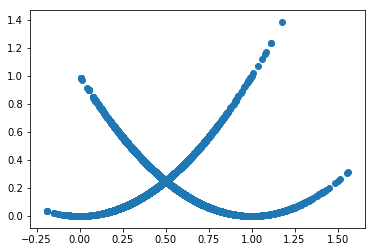

In [46]:
plt.scatter(yhat_0500.values, (y.values - yhat_0500.values)**2 );

In [47]:
results_sofar["0500"] = [results_0500.rsquared, results_0500.rsquared_adj, gof_range(yhat_0500)[1], gof_pcp(yhat_0500)[1], len(yhat_0500)]
results_sofar

0101         0102         0200         0300         0500
R^2           0.341268     0.343231     0.344056     0.344056     0.349464
R^2 Adj.      0.336844     0.338200     0.338928     0.338928     0.344481
Out Range     0.078176     0.079572     0.078641     0.078641     0.084846
GoF           0.771677     0.771677     0.774159     0.774159     0.777881
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000

<br>

# Model 0501

In [48]:
list_col_0501 =  ["count_events", "count_past_votes", "count_total", "HHI_age", "inter_mean", 
                  "share_lawyer", "share_PSD", "share_CDS", "share_BE", "share_PEV", "share_PCP",
                  "HHI_party", 
                  #"count_men_opp_party", "count_women_gov_party", 
                  "count_women_opp_party",
                  #"count_total_count_men_opp_party", "count_total_count_women_opp_party",
                  #"count_total_count_women_gov_party", 
                  "share_gov_party", "share_gov_party_maj_abs",
                  "maj_abs", "coal", "gov_PSD", "gov_CDS", "gov_PS", "gov_PCP", "yr_1992", "yr_1993", 
                  "yr_1994", "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000", "yr_2001", 
                  "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", "yr_2007", "yr_2008", "yr_2009",
                  "yr_2010", "yr_2011", "yr_2012", "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017",
                  
                  "count_opp_party", "count_opp_party__count_women_opp_party"]


In [49]:
data_0501 = sm.add_constant(data[list_col_0501])
y_0501 = data.init_vote_result
X_0501 = data_0501
model_0501 = sm.OLS(y,X_0501)
results_0501 = model_0501.fit()
results_0501.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     514.3
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:31   Log-Likelihood:                -3276.5
No. Observations:                6447   AIC:                             6647.
Df Residuals:                    6400   BIC:                             6965.
Df Model:                          46                                         
Covariance Type:                  HC3                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.8441      0.088      9.542      0.000       0.671       1.017
count_events                              -0.0391      0.003    -12.064      0.000      -0.045      -0.033
count_past_votes                           0.1472      0.006     25.894      0.000       0.136       0.158
count_total                                0.0031      0.002      1.910      0.056   -8.18e-05       0.006
HHI_age                                    0.0950      0.033      2.838      0.005       0.029       0.161
inter_mean                             -6.317e-05   4.05e-05     -1.559      0.119      -0.000    1.63e-05
share_lawyer                              -0.0745      0.031     -2.395      0.017      -0.136      -0.014
share_PSD                                  0.0437      0.019      2.342      0.019       0.007       0.080
share_CDS                               1.303e-14   1.72e-15      7.567      0.000    9.65e-15    1.64e-14
share_BE                                  -0.1984      0.022     -8.929      0.000      -0.242      -0.155
share_PEV                                 -0.0448      0.038     -1.175      0.240      -0.120       0.030
share_PCP                                 -0.0844      0.020     -4.119      0.000      -0.125      -0.044
HHI_party                                 -0.3963      0.070     -5.666      0.000      -0.533      -0.259
count_women_opp_party                     -0.0004      0.009     -0.049      0.961      -0.017       0.016
share_gov_party                            0.1465      0.029      5.043      0.000       0.090       0.203
share_gov_party_maj_abs                    0.1651      0.031      5.403      0.000       0.105       0.225
maj_abs                                   -0.3652      0.067     -5.452      0.000      -0.496      -0.234
coal                                       0.0354      0.064      0.557      0.578      -0.089       0.160
gov_PSD                                    0.5756      0.114      5.058      0.000       0.352       0.799
gov_CDS                                   -0.3037      0.104     -2.915      0.004      -0.508      -0.099
gov_PS                                     0.2685      0.065      4.141      0.000       0.141       0.396
gov_PCP                                    0.3391      0.077      4.419      0.000       0.189       0.489
yr_1992                                   -0.3161      0.173     -1.825      0.068      -0.655       0.023
yr_1993                                   -0.2109      0.168     -1.253      0.210      -0.541       0.119
yr_1994                                   -0.2485      0.172     -1.448      0.148      -0.585       0.088
yr_1995                                   -0.0534      0.163     -0.329      0.742     

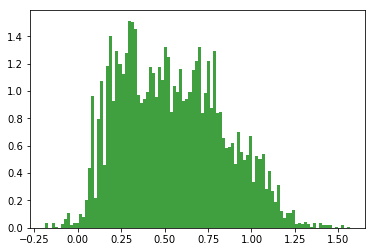

In [50]:
yhat_0501 = results_0501.predict(X_0501);
plt.hist(yhat_0501, 100, density=1, facecolor='green', alpha=0.75);

In [51]:
print(gof_range(yhat_0501)[0])

Values under 0: 0.62%.
Values over 1: 7.74%.
Values fucked up: 8.36%.


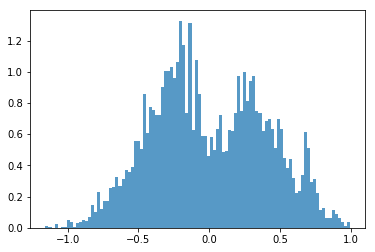

In [52]:
plt.hist(y-yhat_0501, 100, density=1, alpha=0.75);

In [53]:
print(gof_pcp(yhat_0501)[0])

Percent Correctly Predicted: 77.66%.


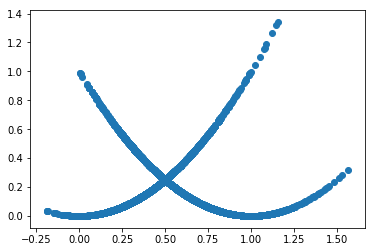

In [54]:
plt.scatter(yhat_0501.values, (y.values - yhat_0501.values)**2 );

In [55]:
results_sofar["0501"] = [results_0501.rsquared, results_0501.rsquared_adj, gof_range(yhat_0501)[1], gof_pcp(yhat_0501)[1], len(yhat_0501)]
results_sofar

0101         0102         0200         0300         0500  \
R^2           0.341268     0.343231     0.344056     0.344056     0.349464   
R^2 Adj.      0.336844     0.338200     0.338928     0.338928     0.344481   
Out Range     0.078176     0.079572     0.078641     0.078641     0.084846   
GoF           0.771677     0.771677     0.774159     0.774159     0.777881   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0501  
R^2           0.347991  
R^2 Adj.      0.343304  
Out Range     0.083605  
GoF           0.776640  
n          6447.000000

<br>

> # Model 06

# Model 0600

In [56]:
list_col_0600 =  ["count_events", "count_past_votes", "count_total", "HHI_age", "comi_mean", "leg_mean", "share_2029", "share_3039", "share_5059", "share_6069", "share_7079", "share_PSD", "share_CDS", "share_BE", "share_PEV", "share_PCP", "HHI_party", "share_men_gov_party", "share_women_gov_party", "share_women", "maj_abs", "coal", "gov_PSD", "gov_CDS", "gov_BE", "yr_1992", "yr_1993", "yr_1994", "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000", "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012", "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [57]:
data_0600 = sm.add_constant(data[list_col_0600])
y_0600 = data.init_vote_result
X_0600 = data_0600
model_0600 = sm.OLS(y,X_0600)
results_0600 = model_0600.fit()
results_0600.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     491.2
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:35   Log-Likelihood:                -3265.9
No. Observations:                6447   AIC:                             6632.
Df Residuals:                    6397   BIC:                             6970.
Df Model:                          49                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.0985      0.107     10.289      0.000       0.889       1.308
count_events             -0.0391      0.003    -12.116      0.000      -0.045      -0.033
count_past_votes          0.1480      0.006     26.101      0.000       0.137       0.159
count_total               0.0020      0.001      1.445      0.149      -0.001       0.005
HHI_age                   0.1150      0.033      3.513      0.000       0.051       0.179
comi_mean                -0.0838      0.014     -5.901      0.000      -0.112      -0.056
leg_mean                  0.0255      0.009      2.750      0.006       0.007       0.044
share_2029               -0.1296      0.069     -1.883      0.060      -0.265       0.005
share_3039               -0.0598      0.030     -1.999      0.046      -0.118      -0.001
share_5059                0.0400      0.027      1.478      0.140      -0.013       0.093
share_6069                0.1098      0.050      2.213      0.027       0.013       0.207
share_7079                0.1201      0.107      1.125      0.261      -0.089       0.329
share_PSD                 0.0976      0.016      5.920      0.000       0.065       0.130
share_CDS              1.429e-15   1.38e-15      1.037      0.300   -1.27e-15    4.13e-15
share_BE                 -0.1602      0.018     -8.736      0.000      -0.196      -0.124
share_PEV                 0.0516      0.037      1.402      0.161      -0.021       0.124
share_PCP                -0.0262      0.018     -1.419      0.156      -0.062       0.010
HHI_party                -0.3951      0.072     -5.511      0.000      -0.536      -0.255
share_men_gov_party       0.2643      0.019     13.751      0.000       0.227       0.302
share_women_gov_party     0.3345      0.047      7.050      0.000       0.242       0.428
share_women               0.0279      0.036      0.780      0.436      -0.042       0.098
maj_abs                  -0.4008      0.067     -5.971      0.000      -0.532      -0.269
coal                      0.0957      0.062      1.541      0.123      -0.026       0.217
gov_PSD                   0.3737      0.156      2.395      0.017       0.068       0.680
gov_CDS                  -0.3313      0.099     -3.336      0.001      -0.526      -0.137
gov_BE                    0.4270      0.074      5.780      0.000       0.282       0.572
yr_1992                  -0.3595      0.167     -2.154      0.031      -0.687      -0.032
yr_1993                  -0.2486      0.163     -1.528      0.127      -0.568       0.070
yr_1994                  -0.3077      0.166     -1.855      0.064      -0.633       0.017
yr_1995                  -0.0948      0.157     -0.605      0.545      -0.402       0.212
yr_1996                   0.0422      0.084      0.499      0.618      -0.123       0.208
yr_1997                

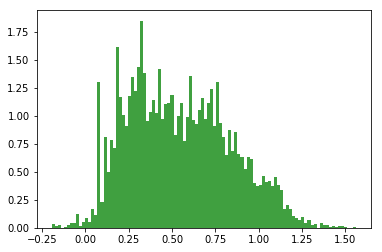

In [58]:
yhat_0600 = results_0600.predict(X_0600);
plt.hist(yhat_0600, 100, density=1, facecolor='green', alpha=0.75);

In [59]:
print(gof_range(yhat_0600)[0])

Values under 0: 0.7%.
Values over 1: 7.85%.
Values fucked up: 8.55%.


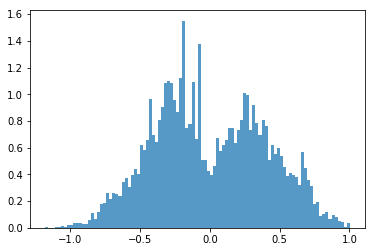

In [60]:
plt.hist(y-yhat_0600, 100, density=1, alpha=0.75);

In [61]:
print(gof_pcp(yhat_0600)[0])

Percent Correctly Predicted: 77.77%.


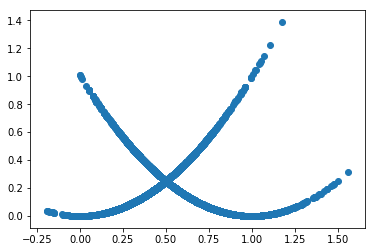

In [62]:
plt.scatter(yhat_0600.values, (y.values - yhat_0600.values)**2 );

In [63]:
results_sofar["0600"] = [results_0600.rsquared, results_0600.rsquared_adj, gof_range(yhat_0600)[1], gof_pcp(yhat_0600)[1], len(yhat_0600)]
results_sofar

0101         0102         0200         0300         0500  \
R^2           0.341268     0.343231     0.344056     0.344056     0.349464   
R^2 Adj.      0.336844     0.338200     0.338928     0.338928     0.344481   
Out Range     0.078176     0.079572     0.078641     0.078641     0.084846   
GoF           0.771677     0.771677     0.774159     0.774159     0.777881   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0501         0600  
R^2           0.347991     0.350141  
R^2 Adj.      0.343304     0.345163  
Out Range     0.083605     0.085466  
GoF           0.776640     0.777726  
n          6447.000000  6447.000000

<br>

# Model 0601

In [64]:
list_col_0601 =  ["count_events", "count_past_votes", "count_total", "HHI_age", 
                  "comi_mean", "leg_mean", "share_2029", "share_3039", "share_5059", 
                  "share_6069", "share_7079", "share_PSD", "share_CDS", "share_BE", 
                  "share_PEV", "share_PCP", "HHI_party", 
                  #"share_men_gov_party", "share_women_gov_party", 
                  "share_women", "maj_abs", "coal", 
                  "gov_PSD", "gov_CDS", "gov_BE", "yr_1992", "yr_1993", "yr_1994", 
                  "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000", 
                  "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", 
                  "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012",
                  "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [65]:
data_0601 = sm.add_constant(data[list_col_0601])
y_0601 = data.init_vote_result
X_0601 = data_0601
model_0601 = sm.OLS(y,X_0601)
results_0601 = model_0601.fit()
results_0601.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     425.0
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:40   Log-Likelihood:                -3387.1
No. Observations:                6447   AIC:                             6870.
Df Residuals:                    6399   BIC:                             7195.
Df Model:                          47                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1549      0.112     10.356      0.000       0.936       1.374
count_events        -0.0400      0.003    -12.245      0.000      -0.046      -0.034
count_past_votes     0.1560      0.006     27.001      0.000       0.145       0.167
count_total          0.0033      0.001      2.227      0.026       0.000       0.006
HHI_age              0.0891      0.033      2.683      0.007       0.024       0.154
comi_mean           -0.0599      0.015     -4.082      0.000      -0.089      -0.031
leg_mean             0.0119      0.010      1.249      0.212      -0.007       0.031
share_2029          -0.1333      0.069     -1.941      0.052      -0.268       0.001
share_3039          -0.0138      0.030     -0.454      0.650      -0.073       0.046
share_5059           0.0106      0.028      0.386      0.700      -0.043       0.065
share_6069           0.1291      0.051      2.509      0.012       0.028       0.230
share_7079           0.3733      0.119      3.126      0.002       0.139       0.607
share_PSD            0.0199      0.018      1.124      0.261      -0.015       0.055
share_CDS         2.102e-15   4.43e-16      4.749      0.000    1.23e-15    2.97e-15
share_BE            -0.2443      0.017    -14.226      0.000      -0.278      -0.211
share_PEV           -0.0409      0.037     -1.102      0.270      -0.113       0.032
share_PCP           -0.1138      0.018     -6.447      0.000      -0.148      -0.079
HHI_party           -0.4467      0.075     -5.917      0.000      -0.595      -0.299
share_women          0.0798      0.031      2.567      0.010       0.019       0.141
maj_abs             -0.3691      0.068     -5.432      0.000      -0.502      -0.236
coal                 0.1638      0.067      2.450      0.014       0.033       0.295
gov_PSD              0.3105      0.171      1.818      0.069      -0.024       0.645
gov_CDS             -0.4022      0.110     -3.669      0.000      -0.617      -0.187
gov_BE               0.5660      0.079      7.205      0.000       0.412       0.720
yr_1992             -0.2558      0.183     -1.400      0.162      -0.614       0.102
yr_1993             -0.1012      0.178     -0.570      0.569      -0.450       0.247
yr_1994             -0.2039      0.182     -1.122      0.262      -0.560       0.152
yr_1995              0.0658      0.172      0.383      0.702      -0.271       0.403
yr_1996              0.1651      0.087      1.907      0.057      -0.005       0.335
yr_1997              0.1061      0.079      1.349      0.177      -0.048       0.260
yr_1998             -0.0172      0.085     -0.201      0.840      -0.185       0.150
yr_1999              0.0503      0.079      0.637      0.524      -0.105       0.205
yr_2000             -0.0140      0.086     -0.163      0.871      -0.183       0.155
yr_2001              0.

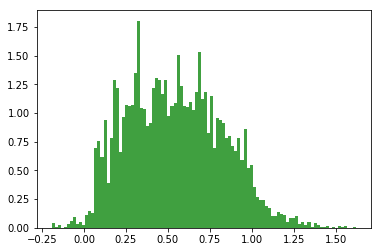

In [66]:
yhat_0601 = results_0601.predict(X_0601);
plt.hist(yhat_0601, 100, density=1, facecolor='green', alpha=0.75);

In [67]:
print(gof_range(yhat_0601)[0])

Values under 0: 0.7%.
Values over 1: 5.29%.
Values fucked up: 5.99%.


In [68]:
plt.hist(y-yhat_0601, 100, density=1, alpha=0.75);

In [69]:
print(gof_pcp(yhat_0601)[0])

Percent Correctly Predicted: 76.39%.


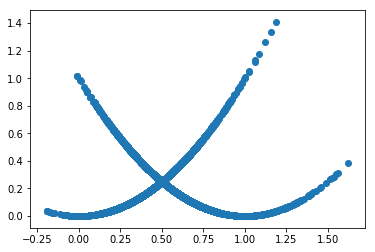

In [70]:
plt.scatter(yhat_0601.values, (y.values - yhat_0601.values)**2 );

In [71]:
results_sofar["0601"] = [results_0601.rsquared, results_0601.rsquared_adj, gof_range(yhat_0601)[1], gof_pcp(yhat_0601)[1], len(yhat_0601)]
results_sofar

0101         0102         0200         0300         0500  \
R^2           0.341268     0.343231     0.344056     0.344056     0.349464   
R^2 Adj.      0.336844     0.338200     0.338928     0.338928     0.344481   
Out Range     0.078176     0.079572     0.078641     0.078641     0.084846   
GoF           0.771677     0.771677     0.774159     0.774159     0.777881   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0501         0600         0601  
R^2           0.347991     0.350141     0.325227  
R^2 Adj.      0.343304     0.345163     0.320271  
Out Range     0.083605     0.085466     0.059873  
GoF           0.776640     0.777726     0.763921  
n          6447.000000  6447.000000  6447.000000

<br>

# Model 0602

In [72]:
list_col_0602 =  ["count_events", "count_past_votes", "count_total", "HHI_age", 
                  "comi_mean", "leg_mean", "share_2029", "share_3039", "share_5059", 
                  "share_6069", "share_7079", "share_PSD", "share_CDS", "share_BE", 
                  "share_PEV", "share_PCP", "HHI_party", 
                  #"share_men_gov_party", "share_women_gov_party", 
                  "share_women", "maj_abs", "coal", 
                  "gov_PSD", "gov_CDS", "gov_BE", "yr_1992", "yr_1993", "yr_1994", 
                  "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000", 
                  "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", 
                  "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012",
                  "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017",
                  
                  "share_gov_party"]

In [73]:
data_0602 = sm.add_constant(data[list_col_0602])
y_0602 = data.init_vote_result
X_0602 = data_0602
model_0602 = sm.OLS(y,X_0602)
results_0602 = model_0602.fit()
results_0602.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     517.2
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:44   Log-Likelihood:                -3266.4
No. Observations:                6447   AIC:                             6631.
Df Residuals:                    6398   BIC:                             6963.
Df Model:                          48                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0888      0.107     10.220      0.000       0.880       1.298
count_events        -0.0390      0.003    -12.085      0.000      -0.045      -0.033
count_past_votes     0.1479      0.006     26.086      0.000       0.137       0.159
count_total          0.0021      0.001      1.492      0.136      -0.001       0.005
HHI_age              0.1148      0.033      3.510      0.000       0.051       0.179
comi_mean           -0.0821      0.014     -5.820      0.000      -0.110      -0.054
leg_mean             0.0251      0.009      2.710      0.007       0.007       0.043
share_2029          -0.1349      0.069     -1.969      0.049      -0.269      -0.001
share_3039          -0.0638      0.029     -2.167      0.030      -0.122      -0.006
share_5059           0.0380      0.027      1.409      0.159      -0.015       0.091
share_6069           0.1074      0.049      2.171      0.030       0.010       0.204
share_7079           0.1164      0.107      1.090      0.276      -0.093       0.326
share_PSD            0.0964      0.017      5.830      0.000       0.064       0.129
share_CDS         1.966e-15   7.14e-16      2.753      0.006    5.66e-16    3.37e-15
share_BE            -0.1631      0.018     -9.071      0.000      -0.198      -0.128
share_PEV            0.0462      0.036      1.271      0.204      -0.025       0.117
share_PCP           -0.0247      0.018     -1.343      0.179      -0.061       0.011
HHI_party           -0.3914      0.072     -5.455      0.000      -0.532      -0.251
share_women          0.0430      0.031      1.404      0.160      -0.017       0.103
maj_abs             -0.3984      0.067     -5.927      0.000      -0.530      -0.267
coal                 0.0961      0.062      1.552      0.121      -0.025       0.218
gov_PSD              0.3715      0.155      2.391      0.017       0.067       0.676
gov_CDS             -0.3348      0.099     -3.390      0.001      -0.528      -0.141
gov_BE               0.4309      0.074      5.844      0.000       0.286       0.575
yr_1992             -0.3573      0.166     -2.148      0.032      -0.683      -0.031
yr_1993             -0.2486      0.162     -1.533      0.125      -0.566       0.069
yr_1994             -0.3064      0.165     -1.854      0.064      -0.630       0.018
yr_1995             -0.0952      0.156     -0.610      0.542      -0.401       0.211
yr_1996              0.0421      0.085      0.497      0.619      -0.124       0.208
yr_1997              0.0036      0.076      0.048      0.962      -0.146       0.153
yr_1998             -0.1020      0.083     -1.223      0.221      -0.265       0.061
yr_1999             -0.0433      0.076     -0.566      0.571      -0.193       0.107
yr_2000             -0.0927      0.083     -1.115      0.265      -0.256       0.070
yr_2001              0.

In [74]:
yhat_0602 = results_0602.predict(X_0602);
plt.hist(yhat_0602, 100, density=1, facecolor='green', alpha=0.75);

In [75]:
print(gof_range(yhat_0602)[0])

Values under 0: 0.7%.
Values over 1: 7.82%.
Values fucked up: 8.52%.


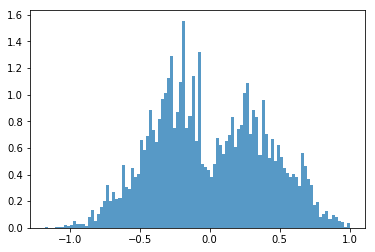

In [76]:
plt.hist(y-yhat_0602, 100, density=1, alpha=0.75);

In [77]:
print(gof_pcp(yhat_0602)[0])

Percent Correctly Predicted: 77.82%.


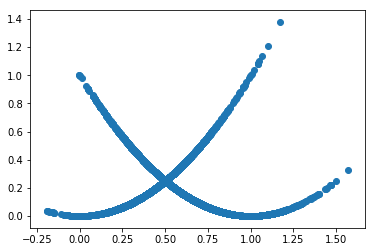

In [78]:
plt.scatter(yhat_0602.values, (y.values - yhat_0602.values)**2 );

In [79]:
results_sofar["0602"] = [results_0602.rsquared, results_0602.rsquared_adj, gof_range(yhat_0602)[1], gof_pcp(yhat_0602)[1], len(yhat_0602)]
results_sofar

0101         0102         0200         0300         0500  \
R^2           0.341268     0.343231     0.344056     0.344056     0.349464   
R^2 Adj.      0.336844     0.338200     0.338928     0.338928     0.344481   
Out Range     0.078176     0.079572     0.078641     0.078641     0.084846   
GoF           0.771677     0.771677     0.774159     0.774159     0.777881   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0501         0600         0601         0602  
R^2           0.347991     0.350141     0.325227     0.350040  
R^2 Adj.      0.343304     0.345163     0.320271     0.345164  
Out Range     0.083605     0.085466     0.059873     0.085156  
GoF           0.776640     0.777726     0.763921     0.778191  
n          6447.000000  6447.000000  6447.000000  6447.000000

<br>

# Model 0603

In [80]:
list_col_0603 =  ["count_events", "count_past_votes", "count_total", "HHI_age", 
                  "comi_mean", "leg_mean", "share_2029", "share_3039", "share_5059", 
                  "share_6069", "share_7079", "share_PSD", "share_CDS", "share_BE", 
                  "share_PEV", "share_PCP", "HHI_party", "share_men_gov_party", 
                  "share_women_gov_party", 
                  #"share_women", 
                  "maj_abs", "coal", 
                  "gov_PSD", "gov_CDS", "gov_BE", "yr_1992", "yr_1993", "yr_1994",
                  "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000",
                  "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", 
                  "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012", 
                  "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [81]:
data_0603 = sm.add_constant(data[list_col_0603])
y_0603 = data.init_vote_result
X_0603 = data_0603
model_0603 = sm.OLS(y,X_0603)
results_0603 = model_0603.fit()
results_0603.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     513.0
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:49   Log-Likelihood:                -3266.2
No. Observations:                6447   AIC:                             6630.
Df Residuals:                    6398   BIC:                             6962.
Df Model:                          48                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1116      0.105     10.594      0.000       0.906       1.317
count_events             -0.0390      0.003    -12.097      0.000      -0.045      -0.033
count_past_votes          0.1478      0.006     26.082      0.000       0.137       0.159
count_total               0.0019      0.001      1.369      0.171      -0.001       0.005
HHI_age                   0.1122      0.033      3.446      0.001       0.048       0.176
comi_mean                -0.0851      0.014     -6.045      0.000      -0.113      -0.057
leg_mean                  0.0254      0.009      2.737      0.006       0.007       0.044
share_2029               -0.1264      0.069     -1.836      0.066      -0.261       0.009
share_3039               -0.0574      0.030     -1.926      0.054      -0.116       0.001
share_5059                0.0436      0.027      1.631      0.103      -0.009       0.096
share_6069                0.1079      0.050      2.175      0.030       0.011       0.205
share_7079                0.1145      0.106      1.075      0.282      -0.094       0.323
share_PSD                 0.0965      0.016      5.880      0.000       0.064       0.129
share_CDS              5.309e-16   3.25e-16      1.634      0.102   -1.06e-16    1.17e-15
share_BE                 -0.1563      0.017     -8.967      0.000      -0.190      -0.122
share_PEV                 0.0621      0.035      1.793      0.073      -0.006       0.130
share_PCP                -0.0274      0.018     -1.489      0.136      -0.063       0.009
HHI_party                -0.3956      0.072     -5.521      0.000      -0.536      -0.255
share_men_gov_party       0.2591      0.018     14.258      0.000       0.223       0.295
share_women_gov_party     0.3542      0.040      8.906      0.000       0.276       0.432
maj_abs                  -0.4022      0.067     -6.002      0.000      -0.534      -0.271
coal                      0.0956      0.062      1.538      0.124      -0.026       0.217
gov_PSD                   0.3757      0.156      2.403      0.016       0.069       0.682
gov_CDS                  -0.3292      0.099     -3.312      0.001      -0.524      -0.134
gov_BE                    0.4248      0.074      5.767      0.000       0.280       0.569
yr_1992                  -0.3658      0.167     -2.191      0.028      -0.693      -0.039
yr_1993                  -0.2553      0.163     -1.569      0.117      -0.574       0.064
yr_1994                  -0.3144      0.166     -1.896      0.058      -0.640       0.011
yr_1995                  -0.1024      0.156     -0.655      0.513      -0.409       0.204
yr_1996                   0.0363      0.084      0.432      0.665      -0.128       0.201
yr_1997                  -0.0034      0.075     -0.045      0.964      -0.151       0.144
yr_1998                

In [82]:
yhat_0603 = results_0603.predict(X_0603);
plt.hist(yhat_0603, 100, density=1, facecolor='green', alpha=0.75);

In [83]:
print(gof_range(yhat_0603)[0])

Values under 0: 0.71%.
Values over 1: 7.88%.
Values fucked up: 8.59%.


In [84]:
plt.hist(y-yhat_0603, 100, density=1, alpha=0.75);

In [85]:
print(gof_pcp(yhat_0603)[0])

Percent Correctly Predicted: 77.87%.


In [86]:
plt.scatter(yhat_0603.values, (y.values - yhat_0603.values)**2 );

In [87]:
results_sofar["0603"] = [results_0603.rsquared, results_0603.rsquared_adj, gof_range(yhat_0603)[1], gof_pcp(yhat_0603)[1], len(yhat_0603)]
results_sofar

0101         0102         0200         0300         0500  \
R^2           0.341268     0.343231     0.344056     0.344056     0.349464   
R^2 Adj.      0.336844     0.338200     0.338928     0.338928     0.344481   
Out Range     0.078176     0.079572     0.078641     0.078641     0.084846   
GoF           0.771677     0.771677     0.774159     0.774159     0.777881   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0501         0600         0601         0602         0603  
R^2           0.347991     0.350141     0.325227     0.350040     0.350075  
R^2 Adj.      0.343304     0.345163     0.320271     0.345164     0.345199  
Out Range     0.083605     0.085466     0.059873     0.085156     0.085931  
GoF           0.776640     0.777726     0.763921     0.778191     0.778657  
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000

<br>

# Model 0604

In [88]:
list_col_0604 =  ["count_events", "count_past_votes", "count_total", "HHI_age", 
                  "comi_mean", "leg_mean", "share_2029", "share_3039", "share_5059", 
                  "share_6069", "share_7079", "share_PSD", "share_CDS", "share_BE", 
                  "share_PEV", "share_PCP", "HHI_party", 
                  "share_men_opp_party", "share_women_opp_party", 
                  #"share_women", 
                  "maj_abs", "coal", 
                  "gov_PSD", "gov_CDS", "gov_BE", "yr_1992", "yr_1993", "yr_1994",
                  "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000",
                  "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", 
                  "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012", 
                  "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [89]:
data_0604 = sm.add_constant(data[list_col_0604])
y_0604 = data.init_vote_result
X_0604 = data_0604
model_0604 = sm.OLS(y,X_0604)
results_0604 = model_0604.fit()
results_0604.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     512.6
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:54   Log-Likelihood:                -3267.1
No. Observations:                6447   AIC:                             6632.
Df Residuals:                    6398   BIC:                             6964.
Df Model:                          48                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3844      0.107     12.953      0.000       1.175       1.594
count_events             -0.0388      0.003    -12.042      0.000      -0.045      -0.033
count_past_votes          0.1477      0.006     26.043      0.000       0.137       0.159
count_total               0.0020      0.001      1.432      0.152      -0.001       0.005
HHI_age                   0.1118      0.033      3.423      0.001       0.048       0.176
comi_mean                -0.0822      0.014     -5.798      0.000      -0.110      -0.054
leg_mean                  0.0246      0.009      2.664      0.008       0.007       0.043
share_2029               -0.1353      0.069     -1.969      0.049      -0.270      -0.001
share_3039               -0.0642      0.030     -2.165      0.030      -0.122      -0.006
share_5059                0.0403      0.027      1.487      0.137      -0.013       0.093
share_6069                0.1038      0.049      2.100      0.036       0.007       0.201
share_7079                0.1078      0.106      1.013      0.311      -0.101       0.316
share_PSD                 0.0942      0.016      5.725      0.000       0.062       0.127
share_CDS              2.517e-15   1.42e-15      1.767      0.077   -2.75e-16    5.31e-15
share_BE                 -0.1611      0.018     -8.783      0.000      -0.197      -0.125
share_PEV                 0.0533      0.037      1.449      0.147      -0.019       0.125
share_PCP                -0.0247      0.018     -1.341      0.180      -0.061       0.011
HHI_party                -0.3892      0.072     -5.423      0.000      -0.530      -0.249
share_men_opp_party      -0.2890      0.016    -17.768      0.000      -0.321      -0.257
share_women_opp_party    -0.2642      0.032     -8.223      0.000      -0.327      -0.201
maj_abs                  -0.3980      0.067     -5.926      0.000      -0.530      -0.266
coal                      0.0963      0.062      1.556      0.120      -0.025       0.218
gov_PSD                   0.3721      0.155      2.398      0.017       0.068       0.676
gov_CDS                  -0.3351      0.099     -3.395      0.001      -0.529      -0.142
gov_BE                    0.4314      0.074      5.843      0.000       0.287       0.576
yr_1992                  -0.3624      0.166     -2.180      0.029      -0.688      -0.037
yr_1993                  -0.2556      0.162     -1.578      0.115      -0.573       0.062
yr_1994                  -0.3125      0.165     -1.893      0.058      -0.636       0.011
yr_1995                  -0.1034      0.156     -0.665      0.506      -0.409       0.202
yr_1996                   0.0359      0.085      0.424      0.672      -0.130       0.202
yr_1997                  -0.0020      0.076     -0.027      0.979      -0.152       0.148
yr_1998                

In [90]:
yhat_0604 = results_0604.predict(X_0604);
plt.hist(yhat_0604, 100, density=1, facecolor='green', alpha=0.75);

In [91]:
print(gof_range(yhat_0604)[0])

Values under 0: 0.7%.
Values over 1: 7.79%.
Values fucked up: 8.48%.


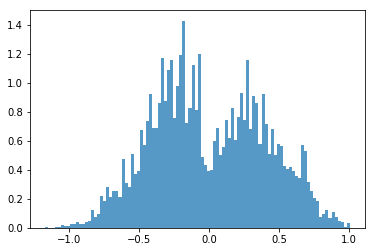

In [92]:
plt.hist(y-yhat_0604, 100, density=1, alpha=0.75);

In [93]:
print(gof_pcp(yhat_0604)[0])

Percent Correctly Predicted: 77.77%.


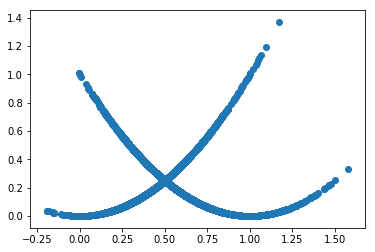

In [94]:
plt.scatter(yhat_0604.values, (y.values - yhat_0604.values)**2 );

In [95]:
results_sofar["0604"] = [results_0604.rsquared, results_0604.rsquared_adj, gof_range(yhat_0604)[1], gof_pcp(yhat_0604)[1], len(yhat_0604)]
results_sofar

0101         0102         0200         0300         0500  \
R^2           0.341268     0.343231     0.344056     0.344056     0.349464   
R^2 Adj.      0.336844     0.338200     0.338928     0.338928     0.344481   
Out Range     0.078176     0.079572     0.078641     0.078641     0.084846   
GoF           0.771677     0.771677     0.774159     0.774159     0.777881   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0501         0600         0601         0602         0603  \
R^2           0.347991     0.350141     0.325227     0.350040     0.350075   
R^2 Adj.      0.343304     0.345163     0.320271     0.345164     0.345199   
Out Range     0.083605     0.085466     0.059873     0.085156     0.085931   
GoF           0.776640     0.777726     0.763921     0.778191     0.778657   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0604  
R^2           0.349899  
R^2 Adj.      0.345022  
Out Range     0.084846  
GoF           0.777726  
n          6447.000000

<br>

# Model 0605

In [96]:
list_col_0605 =  ["count_events", "count_past_votes", "count_total", "HHI_age", 
                  "comi_mean", "leg_mean", "share_2029", "share_3039", "share_5059", 
                  "share_6069", "share_7079", "share_PSD", "share_CDS", "share_BE", 
                  "share_PEV", "share_PCP", "HHI_party", 
                  "share_women_opp_party", "share_women_gov_party", "share_men_opp_party", 
                  #"share_women", 
                  "maj_abs", "coal", 
                  "gov_PSD", "gov_CDS", "gov_BE", "yr_1992", "yr_1993", "yr_1994",
                  "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000",
                  "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", 
                  "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012", 
                  "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [97]:
data_0605 = sm.add_constant(data[list_col_0605])
y_0605 = data.init_vote_result
X_0605 = data_0605
model_0605 = sm.OLS(y,X_0605)
results_0605 = model_0605.fit()
results_0605.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     509.0
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:25:58   Log-Likelihood:                -3265.9
No. Observations:                6447   AIC:                             6632.
Df Residuals:                    6397   BIC:                             6970.
Df Model:                          49                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3628      0.107     12.689      0.000       1.152       1.573
count_events             -0.0391      0.003    -12.116      0.000      -0.045      -0.033
count_past_votes          0.1480      0.006     26.101      0.000       0.137       0.159
count_total               0.0020      0.001      1.445      0.149      -0.001       0.005
HHI_age                   0.1150      0.033      3.513      0.000       0.051       0.179
comi_mean                -0.0838      0.014     -5.901      0.000      -0.112      -0.056
leg_mean                  0.0255      0.009      2.750      0.006       0.007       0.044
share_2029               -0.1296      0.069     -1.883      0.060      -0.265       0.005
share_3039               -0.0598      0.030     -1.999      0.046      -0.118      -0.001
share_5059                0.0400      0.027      1.478      0.140      -0.013       0.093
share_6069                0.1098      0.050      2.213      0.027       0.013       0.207
share_7079                0.1201      0.107      1.125      0.261      -0.089       0.329
share_PSD                 0.0976      0.016      5.920      0.000       0.065       0.130
share_CDS              2.459e-15   9.54e-16      2.579      0.010     5.9e-16    4.33e-15
share_BE                 -0.1602      0.018     -8.736      0.000      -0.196      -0.124
share_PEV                 0.0516      0.037      1.402      0.161      -0.021       0.124
share_PCP                -0.0262      0.018     -1.419      0.156      -0.062       0.010
HHI_party                -0.3951      0.072     -5.511      0.000      -0.536      -0.255
share_women_opp_party    -0.2364      0.035     -6.816      0.000      -0.304      -0.168
share_women_gov_party     0.0982      0.048      2.041      0.041       0.004       0.192
share_men_opp_party      -0.2643      0.019    -13.751      0.000      -0.302      -0.227
maj_abs                  -0.4008      0.067     -5.971      0.000      -0.532      -0.269
coal                      0.0957      0.062      1.541      0.123      -0.026       0.217
gov_PSD                   0.3737      0.156      2.395      0.017       0.068       0.680
gov_CDS                  -0.3313      0.099     -3.336      0.001      -0.526      -0.137
gov_BE                    0.4270      0.074      5.780      0.000       0.282       0.572
yr_1992                  -0.3595      0.167     -2.154      0.031      -0.687      -0.032
yr_1993                  -0.2486      0.163     -1.528      0.127      -0.568       0.070
yr_1994                  -0.3077      0.166     -1.855      0.064      -0.633       0.017
yr_1995                  -0.0948      0.157     -0.605      0.545      -0.402       0.212
yr_1996                   0.0422      0.084      0.499      0.618      -0.123       0.208
yr_1997                

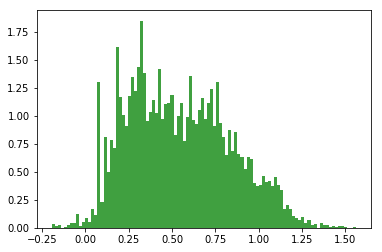

In [98]:
yhat_0605 = results_0605.predict(X_0605);
plt.hist(yhat_0605, 100, density=1, facecolor='green', alpha=0.75);

In [99]:
print(gof_range(yhat_0605)[0])

Values under 0: 0.7%.
Values over 1: 7.85%.
Values fucked up: 8.55%.


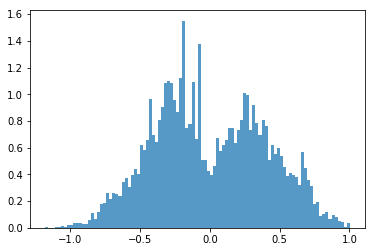

In [100]:
plt.hist(y-yhat_0605, 100, density=1, alpha=0.75);

In [101]:
print(gof_pcp(yhat_0605)[0])

Percent Correctly Predicted: 77.77%.


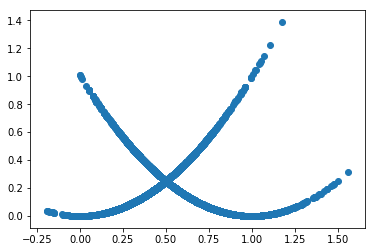

In [102]:
plt.scatter(yhat_0605.values, (y.values - yhat_0605.values)**2 );

In [103]:
results_sofar["0605"] = [results_0605.rsquared, results_0605.rsquared_adj, gof_range(yhat_0605)[1], gof_pcp(yhat_0605)[1], len(yhat_0605)]
results_sofar

0101         0102         0200         0300         0500  \
R^2           0.341268     0.343231     0.344056     0.344056     0.349464   
R^2 Adj.      0.336844     0.338200     0.338928     0.338928     0.344481   
Out Range     0.078176     0.079572     0.078641     0.078641     0.084846   
GoF           0.771677     0.771677     0.774159     0.774159     0.777881   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0501         0600         0601         0602         0603  \
R^2           0.347991     0.350141     0.325227     0.350040     0.350075   
R^2 Adj.      0.343304     0.345163     0.320271     0.345164     0.345199   
Out Range     0.083605     0.085466     0.059873     0.085156     0.085931   
GoF           0.776640     0.777726     0.763921     0.778191     0.778657   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0604         0605  
R^2           0.349899     0.350141  
R^2 Adj.      0.345022     0.345163  
Out Range     0.084846     0.085466  
GoF           0.777726     0.777726  
n          6447.000000  6447.000000

<br>

In [128]:
vif[(vif["VIF Factor"]>= 5) & (vif["VIF Factor"]<= 10)]

VIF Factor  features
6     6.104465  leg_mean
32    6.393907   yr_1998
34    7.917348   yr_2000
38    7.681183   yr_2004
39    8.957640   yr_2005

<br>

# Model 0605_res

In [104]:
list_col_0605_res =  ["count_events", "count_past_votes", "count_total", "HHI_age", 
                  "comi_mean", "leg_mean", "share_2029", "share_3039", "share_5059", 
                  "share_6069", "share_7079", "share_PSD", "share_CDS", "share_BE", 
                  "share_PEV", "share_PCP", "HHI_party", 
                  "share_women_opp_party", "share_women_gov_party", "share_men_opp_party", 
                  #"share_women", 
                  "maj_abs", "coal", 
                  "gov_PSD", "gov_CDS", "gov_BE", "yr_1992", "yr_1993", "yr_1994",
                  "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000",
                  "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", 
                  "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012", 
                  "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [105]:
data_0605_res = sm.add_constant(data_pro_res[list_col_0605_res])
y_0605_res = data_pro_res.init_vote_result
X_0605_res = data_0605_res
model_0605_res = sm.OLS(y_0605_res,X_0605_res)
results_0605_res = model_0605_res.fit()
results_0605_res.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     161.5
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:26:03   Log-Likelihood:                -954.37
No. Observations:                2618   AIC:                             2009.
Df Residuals:                    2568   BIC:                             2302.
Df Model:                          49                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.9053      0.181      4.988      0.000       0.549       1.261
count_events              0.0562      0.008      6.780      0.000       0.040       0.072
count_past_votes          0.0810      0.014      5.880      0.000       0.054       0.108
count_total               0.0011      0.002      0.537      0.591      -0.003       0.005
HHI_age                   0.0944      0.052      1.801      0.072      -0.008       0.197
comi_mean                -0.0541      0.024     -2.271      0.023      -0.101      -0.007
leg_mean                  0.0385      0.019      2.062      0.039       0.002       0.075
share_2029               -0.0256      0.091     -0.281      0.778      -0.204       0.153
share_3039                0.0071      0.054      0.130      0.896      -0.100       0.114
share_5059                0.0897      0.052      1.738      0.082      -0.012       0.191
share_6069                0.1462      0.081      1.816      0.070      -0.012       0.304
share_7079                0.1720      0.214      0.803      0.422      -0.248       0.592
share_PSD                 0.1439      0.027      5.264      0.000       0.090       0.198
share_CDS              2.147e-15    2.6e-15      0.826      0.409   -2.95e-15    7.24e-15
share_BE                 -0.1488      0.027     -5.602      0.000      -0.201      -0.097
share_PEV                -0.0075      0.052     -0.143      0.886      -0.110       0.095
share_PCP                -0.1011      0.029     -3.470      0.001      -0.158      -0.044
HHI_party                -0.3462      0.130     -2.666      0.008      -0.601      -0.092
share_women_opp_party    -0.4194      0.055     -7.591      0.000      -0.528      -0.311
share_women_gov_party    -0.1247      0.094     -1.328      0.184      -0.309       0.059
share_men_opp_party      -0.4756      0.039    -12.320      0.000      -0.551      -0.400
maj_abs                  -0.3487      0.131     -2.654      0.008      -0.606      -0.091
coal                      0.0897      0.118      0.761      0.447      -0.141       0.321
gov_PSD                   0.0414      0.326      0.127      0.899      -0.599       0.681
gov_CDS                  -0.1765      0.207     -0.854      0.393      -0.582       0.229
gov_BE                    0.2662      0.140      1.900      0.058      -0.008       0.541
yr_1992                   0.0178      0.328      0.054      0.957      -0.626       0.662
yr_1993                   0.0239      0.322      0.074      0.941      -0.607       0.655
yr_1994                   0.0653      0.323      0.203      0.840      -0.567       0.698
yr_1995                   0.0488      0.291      0.168      0.867      -0.522       0.619
yr_1996                   0.2287      0.190      1.207      0.228      -0.143       0.600
yr_1997                

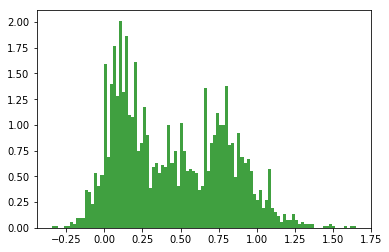

In [106]:
yhat_0605_res = results_0605_res.predict(X_0605_res);
plt.hist(yhat_0605_res, 100, density=1, facecolor='green', alpha=0.75);

In [107]:
print(gof_range(yhat_0605_res)[0])

Values under 0: 6.3%.
Values over 1: 5.84%.
Values fucked up: 12.15%.


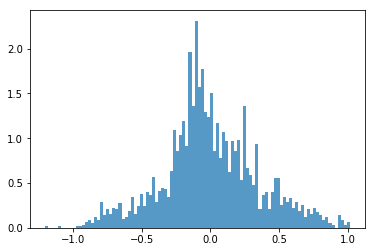

In [108]:
plt.hist(y_0605_res-yhat_0605_res, 100, density=1, alpha=0.75);

In [109]:
print(gof_pcp(yhat_0605_res)[0])

Percent Correctly Predicted: 44.58%.


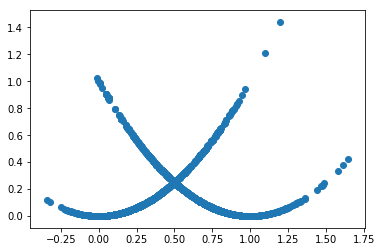

In [110]:
plt.scatter(yhat_0605_res.values, (y_0605_res.values - yhat_0605_res.values)**2 );

In [111]:
results_sofar["0605_res"] = [results_0605_res.rsquared, results_0605_res.rsquared_adj, gof_range(yhat_0605_res)[1], gof_pcp(yhat_0605_res)[1], len(yhat_0605_res.values)]
results_sofar

0101         0102         0200         0300         0500  \
R^2           0.341268     0.343231     0.344056     0.344056     0.349464   
R^2 Adj.      0.336844     0.338200     0.338928     0.338928     0.344481   
Out Range     0.078176     0.079572     0.078641     0.078641     0.084846   
GoF           0.771677     0.771677     0.774159     0.774159     0.777881   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0501         0600         0601         0602         0603  \
R^2           0.347991     0.350141     0.325227     0.350040     0.350075   
R^2 Adj.      0.343304     0.345163     0.320271     0.345164     0.345199   
Out Range     0.083605     0.085466     0.059873     0.085156     0.085931   
GoF           0.776640     0.777726     0.763921     0.778191     0.778657   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0604         0605     0605_res  
R^2           0.349899     0.350141     0.508002  
R^2 Adj.      0.345022     0.345163     0.498614  
Out Range     0.084846     0.085466     0.121467  
GoF           0.777726     0.777726     0.445760  
n          6447.000000  6447.000000  2618.000000

<br>

# Model 0605_law

In [112]:
list_col_0605_law =  ["count_events", "count_past_votes", "count_total", "HHI_age", 
                  "comi_mean", "leg_mean", "share_2029", "share_3039", "share_5059", 
                  "share_6069", "share_7079", "share_PSD", "share_CDS", "share_BE", 
                  "share_PEV", "share_PCP", "HHI_party", 
                  "share_women_opp_party", "share_women_gov_party", "share_men_opp_party", 
                  #"share_women", 
                  "maj_abs", "coal", 
                  "gov_PSD", "gov_CDS", "gov_BE", "yr_1992", "yr_1993", "yr_1994",
                  "yr_1995", "yr_1996", "yr_1997", "yr_1998", "yr_1999", "yr_2000",
                  "yr_2001", "yr_2002", "yr_2003", "yr_2004", "yr_2005", "yr_2006", 
                  "yr_2007", "yr_2008", "yr_2009", "yr_2010", "yr_2011", "yr_2012", 
                  "yr_2013", "yr_2014", "yr_2015", "yr_2016", "yr_2017"]

In [113]:
data_0605_law = sm.add_constant(data_pro_law[list_col_0605_law])
y_0605_law = data_pro_law.init_vote_result
X_0605_law = data_0605_law
model_0605_law = sm.OLS(y_0605_law,X_0605_law)
results_0605_law = model_0605_law.fit()
results_0605_law.get_robustcov_results(cov_type=cov_type_var).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       init_vote_result   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     405.3
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        02:26:05   Log-Likelihood:                -1755.8
No. Observations:                3577   AIC:                             3612.
Df Residuals:                    3527   BIC:                             3921.
Df Model:                          49                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.2935      0.153      8.445      0.000       0.993       1.594
count_events             -0.0666      0.004    -15.719      0.000      -0.075      -0.058
count_past_votes          0.1794      0.007     25.564      0.000       0.166       0.193
count_total              -0.0035      0.002     -1.617      0.106      -0.008       0.001
HHI_age                   0.0870      0.041      2.139      0.032       0.007       0.167
comi_mean                -0.0543      0.019     -2.872      0.004      -0.091      -0.017
leg_mean                  0.0054      0.011      0.490      0.624      -0.016       0.027
share_2029               -0.0797      0.093     -0.859      0.390      -0.262       0.102
share_3039                0.0284      0.036      0.792      0.428      -0.042       0.099
share_5059                0.0402      0.031      1.292      0.196      -0.021       0.101
share_6069                0.0595      0.067      0.887      0.375      -0.072       0.191
share_7079                0.4672      0.265      1.761      0.078      -0.053       0.987
share_PSD                 0.0442      0.020      2.157      0.031       0.004       0.084
share_CDS              1.481e-15   1.31e-15      1.127      0.260    -1.1e-15    4.06e-15
share_BE                 -0.1667      0.026     -6.332      0.000      -0.218      -0.115
share_PEV                -0.0557      0.050     -1.110      0.267      -0.154       0.043
share_PCP                -0.0071      0.024     -0.297      0.766      -0.054       0.040
HHI_party                -0.4131      0.094     -4.400      0.000      -0.597      -0.229
share_women_opp_party    -0.2073      0.047     -4.411      0.000      -0.299      -0.115
share_women_gov_party     0.0791      0.059      1.352      0.176      -0.036       0.194
share_men_opp_party      -0.1720      0.022     -7.676      0.000      -0.216      -0.128
maj_abs                  -0.3167      0.075     -4.202      0.000      -0.464      -0.169
coal                      0.1444      0.099      1.465      0.143      -0.049       0.338
gov_PSD                   0.3728      0.246      1.517      0.129      -0.109       0.855
gov_CDS                  -0.3230      0.162     -1.995      0.046      -0.640      -0.006
gov_BE                    0.4673      0.109      4.271      0.000       0.253       0.682
yr_1992                  -0.3538      0.270     -1.311      0.190      -0.883       0.175
yr_1993                  -0.0652      0.266     -0.246      0.806      -0.586       0.455
yr_1994                  -0.1358      0.272     -0.499      0.618      -0.669       0.398
yr_1995                   0.0579      0.261      0.221      0.825      -0.455       0.570
yr_1996                   0.2143      0.128      1.673      0.094      -0.037       0.465
yr_1997                

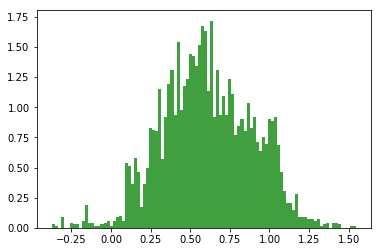

In [114]:
yhat_0605_law = results_0605_law.predict(X_0605_law);
plt.hist(yhat_0605_law, 100, density=1, facecolor='green', alpha=0.75);

In [115]:
print(gof_range(yhat_0605_law)[0])

Values under 0: 1.4%.
Values over 1: 10.01%.
Values fucked up: 11.41%.


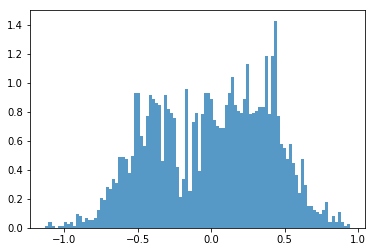

In [116]:
plt.hist(y_0605_law-yhat_0605_law, 100, density=1, alpha=0.75);

In [117]:
print(gof_pcp(yhat_0605_law)[0])

Percent Correctly Predicted: 57.95%.


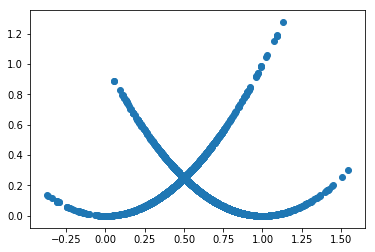

In [118]:
plt.scatter(yhat_0605_law.values, (y_0605_law.values - yhat_0605_law.values)**2 );

In [119]:
results_sofar["0605_law"] = [results_0605_law.rsquared, results_0605_law.rsquared_adj, gof_range(yhat_0605_law)[1], gof_pcp(yhat_0605_law)[1], len(yhat_0605_law.values)]
results_sofar

0101         0102         0200         0300         0500  \
R^2           0.341268     0.343231     0.344056     0.344056     0.349464   
R^2 Adj.      0.336844     0.338200     0.338928     0.338928     0.344481   
Out Range     0.078176     0.079572     0.078641     0.078641     0.084846   
GoF           0.771677     0.771677     0.774159     0.774159     0.777881   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0501         0600         0601         0602         0603  \
R^2           0.347991     0.350141     0.325227     0.350040     0.350075   
R^2 Adj.      0.343304     0.345163     0.320271     0.345164     0.345199   
Out Range     0.083605     0.085466     0.059873     0.085156     0.085931   
GoF           0.776640     0.777726     0.763921     0.778191     0.778657   
n          6447.000000  6447.000000  6447.000000  6447.000000  6447.000000   

                  0604         0605     0605_res     0605_law  
R^2           0.349899     0.350141     0.508002     0.343447  
R^2 Adj.      0.345022     0.345163     0.498614     0.334326  
Out Range     0.084846     0.085466     0.121467     0.114062  
GoF           0.777726     0.777726     0.445760     0.579536  
n          6447.000000  6447.000000  2618.000000  3577.000000

In [120]:
results_sofar[["0605", "0605_res", "0605_law"]]

0605     0605_res     0605_law
R^2           0.350141     0.508002     0.343447
R^2 Adj.      0.345163     0.498614     0.334326
Out Range     0.085466     0.121467     0.114062
GoF           0.777726     0.445760     0.579536
n          6447.000000  2618.000000  3577.000000

<br>